In [13]:
%matplotlib inline
import math
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial import distance 
from collections import defaultdict
from scipy.cluster import hierarchy
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi

In [14]:
_SQRT2 = np.sqrt(2) 
def hellinger3(p, q):
    return np.sqrt(np.sum((np.sqrt(p) - np.sqrt(q)) ** 2)) / _SQRT2

In [15]:
for in range(1,5):
    
    K = nx.read_edgelist('nmi/dblp'+str(i)+'.txt',create_using=nx.Graph(),nodetype=int)
    K.remove_nodes_from(list(nx.isolates(K)))
    A = nx.convert_matrix.to_numpy_array(K)

    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if(i==j):
                temp = 0
                temp1 = 0
                for k in range(j): 
                    temp += A[k][j]
                for k in range(j+1,34):
                    temp1 += A[k][j]
                A[i][j] = temp+temp1

    pij = np.copy(A)
    I = np.copy(A)
    total = np.sum(A)

    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            pij[i][j] = A[i][j] / total        

    pi = np.sum(pij,axis=0)
    pj = np.sum(pij,axis=1)

    a = 0
    b = 0

    for i in range(A.shape[0]):
        for j in range(i+1, A.shape[0]):
            for k in range(A.shape[0]):
                pki = pij[k][i]/pi[i] 
                pkj = pij[k][j]/pj[i]
                pkij = (pij[k][i]+pij[k][j])/(pi[i]+pj[j])
                if(pki > 0):
                    a = a + pki * (math.log(pki) - math.log(pkij))
                else:
                    continue
                if(pkj > 0):
                    b = b + pkj * (math.log(pkj) - math.log(pkij))
                else:
                    continue
            I[i][j] = pi[i] * a + pj[j]*b
    
    labels=K.nodes()
    Z = hierarchy.average(I)
    membership=list(hierarchy.fcluster(Z,t=1.15))
    partition = defaultdict(list)
    for n,p in zip(list(range(len(K))),membership):
        if(p in partition):
            partition[p].append(labels[n])
    partitions = {}
    for i in range(len(membership)):
        partitions[i]=membership[i]
    
    K = nx.read_edgelist('nmi/dblp'+str(i)+'.txt',create_using=nx.Graph(),nodetype=int)
    K.remove_nodes_from(list(nx.isolates(K)))
    
    labels=K.nodes()
    path_length=dict(nx.all_pairs_shortest_path_length(K))
    n = len(K)
    distances=np.zeros((n,n))   
    for u,p in path_length.items():
        for v,d in p.items():
            if((u < n and u in K.nodes()) and (v  < n and v in K.nodes())):
                distances[u][v] = d
                distances[v][u] = d
                if u==v: distances[u][u]=0
    Y = distance.pdist(distances,hellinger3)
    Z = hierarchy.average(Y)
    membership=list(hierarchy.fcluster(Z,t=1.15))
    partition = defaultdict(list)
    for n,p in zip(list(range(len(K))),membership):
        if(p in partition):
            partition[p].append(labels[n])
    partitions1 = {}
    for i in range(len(membership)):
        partitions1[i]=membership[i]
    nmi_list.append(nmi(list(partitions.values()),list(partitions1.values())))
    print(nmi(list(partitions.values()),list(partitions1.values())))

0.6431277083872979
0.7042495926227985
0.7238225923804306
0.769718423900839


Text(0.5,1,'NMI of Hellinger Distance and Closeness Similarity')

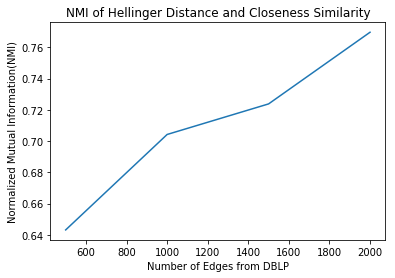

In [18]:
x = [500, 1000, 1500, 2000]
plt.plot(x,nmi_list)
plt.xlabel('Number of Edges from DBLP')
plt.ylabel('Normalized Mutual Information(NMI)')
plt.title('NMI of Hellinger Distance and Closeness Similarity')